In [25]:
import xarray as xr
import os 
import matplotlib.pyplot as plt 
from cartopy import crs  
import cartopy.crs as crs
import numpy as np
import glob
import geopandas as gpd
from shapely.geometry import mapping

In [6]:
%config Completer.use_jedi = False

In [12]:
os.chdir(r"C:\Users\carli\OneDrive\Documentos\Proyectos_de_desarrollo_de_software/Soil_climate_characterization")

In [ ]:
gdf = gpd.read_file('./data/shapefiles/Polygon_Senegal.geojson')

In [15]:
glob.glob('./data/LandDegradation//*.nc')

['./data/LandDegradation\\averageofEOS.nc',
 './data/LandDegradation\\averageofLOS.nc',
 './data/LandDegradation\\averageofmaxEVI.nc',
 './data/LandDegradation\\averageofminEVI.nc',
 './data/LandDegradation\\averageofSOS.nc',
 './data/LandDegradation\\maxEVIslope.nc',
 './data/LandDegradation\\minEVIslope.nc',
 './data/LandDegradation\\PhenTrendEOSslope.nc',
 './data/LandDegradation\\PhenTrendLOSslope.nc',
 './data/LandDegradation\\PhenTrendSOSslope.nc',
 './data/LandDegradation\\STDofEOS.nc',
 './data/LandDegradation\\STDofLOS.nc',
 './data/LandDegradation\\stdofmaxEVI.nc',
 './data/LandDegradation\\stdofminEVI.nc',
 './data/LandDegradation\\STDofSOS.nc']

In [126]:
ds = xr.open_dataset('./data/landDegradation/stdofminEVI.nc',engine='netcdf4')

In [127]:
ds

<xarray.Dataset>
Dimensions:      (longitude: 2762, latitude: 1953, level: 1, time: 1)
Coordinates:
  * longitude    (longitude) float64 -17.54 -17.54 -17.54 ... -11.34 -11.34
  * latitude     (latitude) float64 16.69 16.69 16.69 ... 12.31 12.31 12.31
  * level        (level) float64 1.0
  * time         (time) float64 1.0
Data variables:
    stdofminEVI  (time, level, latitude, longitude) float64 ...

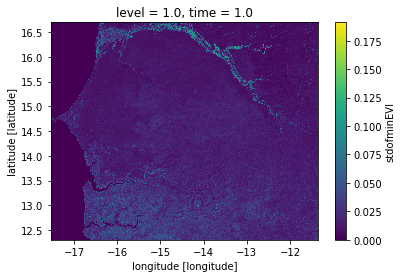

In [128]:
ds.stdofminEVI[0].plot()

In [129]:
ds = ds.rio.write_crs("epsg:4326", inplace=True)

In [130]:
ds = ds.rio.clip(gdf.geometry.apply(mapping), gdf.crs, drop=False)

In [131]:
ds.stdofminEVI[0].rio.to_raster('./data/landDegradation/stdofminEVI.tif')